In [1]:
#importing the libraries 
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
dfmatches = pd.read_csv('matches.csv')
dfdeliveries = pd.read_csv('deliveries.csv')

In [17]:
dfmatches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [7]:
dfdeliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Analyzing matches data

In [18]:
dfmatches.shape

(756, 17)

In [19]:
dfmatches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [21]:
dfmatches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(5), object(12)
memory usag

In [23]:
dfmatches.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [44]:
# to handle the missing Values in matches datasets

print(f'most matches in city: {dfmatches.city.value_counts().idxmax()}')
print(f'most wining team: {dfmatches.winner.value_counts().idxmax()}')
print(f'most man of the match: {dfmatches.player_of_match.value_counts().idxmax()}')
print(f'freq umpire : {dfmatches.umpire1.value_counts().idxmax()}')
print(f'freq umpire : {dfmatches.umpire2.value_counts().idxmax()}')

most matches in city: Mumbai
most wining team: Mumbai Indians
most man of the match: CH Gayle
freq umpire : HDPK Dharmasena
freq umpire : C Shamshuddin


In [45]:
dfmatches['city'].fillna(value='Mumbai', inplace=True)
dfmatches['winner'].fillna(value='Mumbai Indians', inplace=True)
dfmatches['player_of_match'].fillna(value='CH Gayle', inplace=True)
dfmatches['umpire1'].fillna(value='HDPK Dharmasena', inplace=True)
dfmatches['umpire2'].fillna(value='C Shamshuddin', inplace=True)

In [46]:
dfmatches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [38]:
dfmatches.nunique()

id                 756
season              12
city                32
date                14
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
dtype: int64

In [40]:
dfmatches.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

### Analyzing the delivers data

In [25]:
dfdeliveries.shape

(179078, 21)

In [28]:
dfdeliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [26]:
dfdeliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [27]:
dfdeliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [30]:
dfdeliveries.nunique()

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

In [37]:
dfdeliveries.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,179078.0,1802.252957,3472.322805,1.0,190.0,379.0,567.0,11415.0
inning,179078.0,1.482952,0.502074,1.0,1.0,1.0,2.0,5.0
over,179078.0,10.162488,5.677684,1.0,5.0,10.0,15.0,20.0
ball,179078.0,3.615587,1.806966,1.0,2.0,4.0,5.0,9.0
is_super_over,179078.0,0.000452,0.021263,0.0,0.0,0.0,0.0,1.0
wide_runs,179078.0,0.036721,0.251161,0.0,0.0,0.0,0.0,5.0
bye_runs,179078.0,0.004936,0.116480,0.0,0.0,0.0,0.0,4.0
legbye_runs,179078.0,0.021136,0.194908,0.0,0.0,0.0,0.0,5.0
noball_runs,179078.0,0.004183,0.070492,0.0,0.0,0.0,0.0,5.0
penalty_runs,179078.0,0.000056,0.016709,0.0,0.0,0.0,0.0,5.0


In [35]:
print(f'Total Matches: {dfdeliveries.match_id.nunique()}')
print(f'Total Teams: {dfdeliveries.batting_team.nunique()}')

Total Matches: 756
Total Teams: 15


In [79]:
x = dfmatches.iloc[dfmatches['win_by_runs'].idxmax()]
print(f'{x.winner} Won by Max runs: {x.win_by_runs}')

Mumbai Indians Won by Max runs: 146


In [83]:
y = dfmatches.iloc[dfmatches['win_by_wickets'].idxmax()]
print(f'{y.winner} Won by Max wickets: {y.win_by_wickets}')

Kolkata Knight Riders Won by Max wickets: 10


In [85]:
min = dfmatches.iloc[dfmatches['win_by_runs'].idxmin()]
print(f'{min.winner} Won by Min runs: {min.win_by_runs}')

Rising Pune Supergiant Won by Max runs: 0


In [90]:
minn  = dfmatches.iloc[dfmatches['win_by_wickets'].idxmin()]
print(f'{minn.winner} Won by Min wickets: {minn.win_by_wickets}')

Sunrisers Hyderabad Won by Min wickets: 0


# Visualization 

#### which season had the most matches

<AxesSubplot:xlabel='season', ylabel='count'>

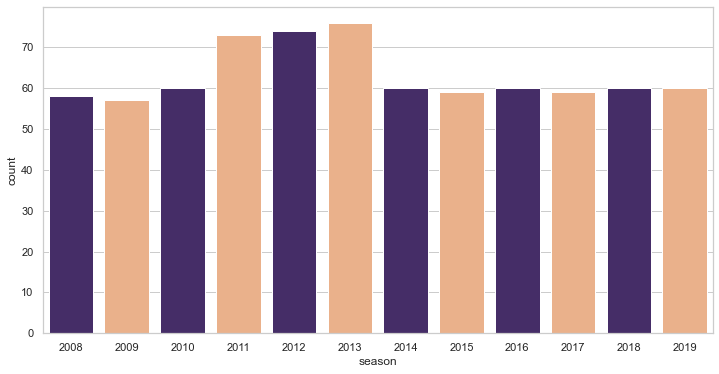

In [129]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
sns.countplot( x=dfmatches["season"],  palette=['#432371',"#FAAE7B"])

<AxesSubplot:xlabel='winner'>

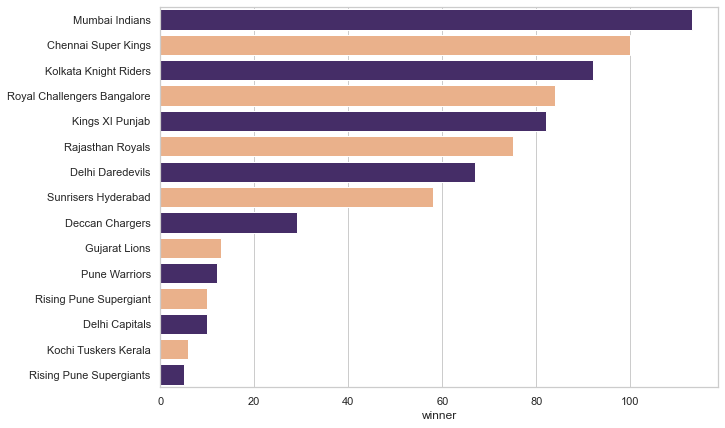

In [128]:
fig = plt.figure(figsize =(10, 7))
winn = dfmatches.winner.value_counts()
sns.barplot(x=winn , y= winn.index, palette=['#432371',"#FAAE7B"])
